# NEURON Simulations Results and Analysis
This notebook contains the commands to generate the plots for the NEURON simulations.

In [2]:
from getData import *
from plot import *

## A) 100 Network

### A.1) Neuronal Distribution

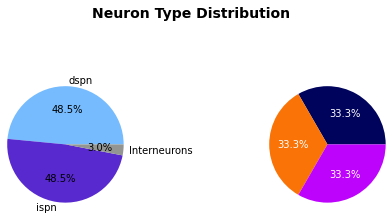

In [3]:
plotNeuronalDistribution('net_100')

### A.2) Random Traces

Plotting the traces of the following neurons :  [68, 91, 49, 38, 50]


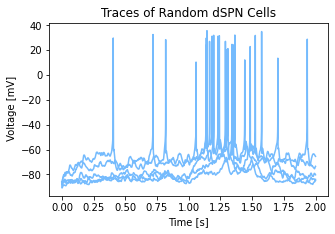

Plotting the traces of the following neurons :  [27, 75, 56, 82, 18]


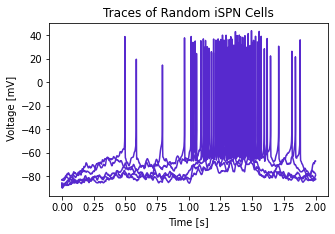

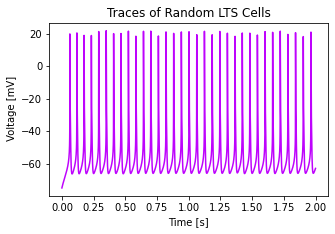

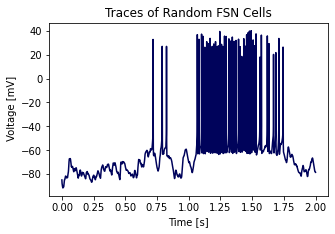

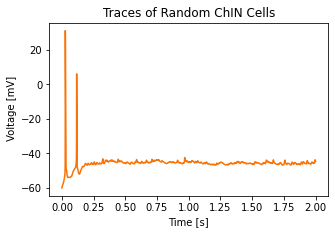

()

In [4]:
plotTraces('net_100','R')

### A.3) Raster Plot

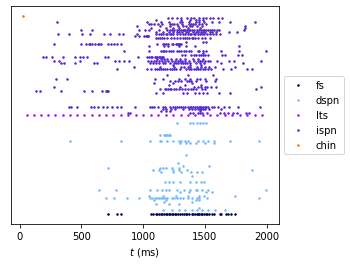

In [5]:
plotRaster('net_100', 100)

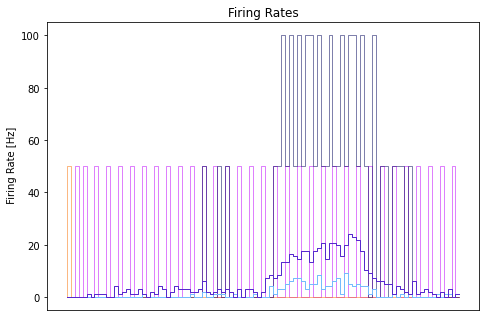

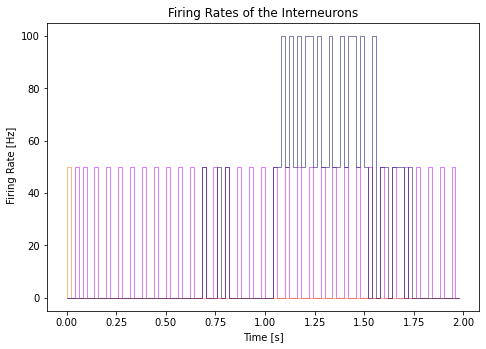

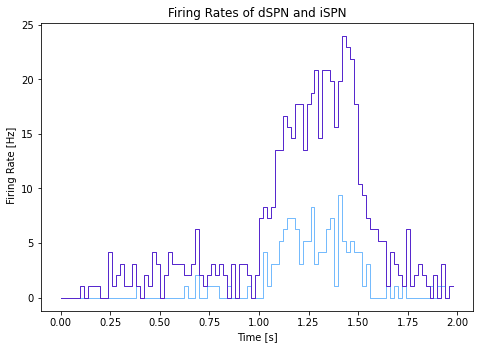

In [6]:
plotFR('net_100')

## B. 1000 Network

### B.1) Neuronal Distribution

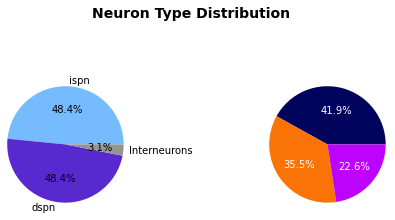

In [6]:
plotNeuronalDistribution('net_1000')

### B.2) Traces

Plotting the traces of the following neurons :  [825, 286, 689, 353, 545]


IndexError: list index out of range

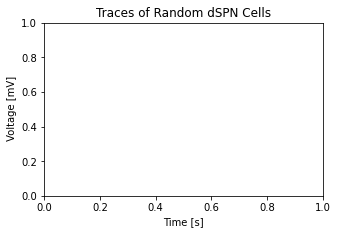

In [7]:
plotTraces('net_1000','R')

### B.3) Raster Plot

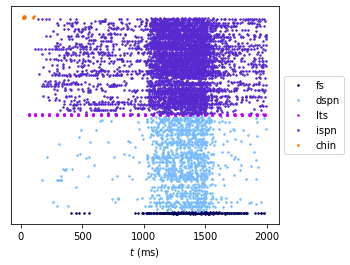

In [14]:
plotRaster('net_1000',1000)

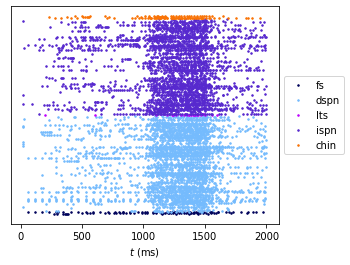

In [17]:
plotRaster('net_1000_B',1000)

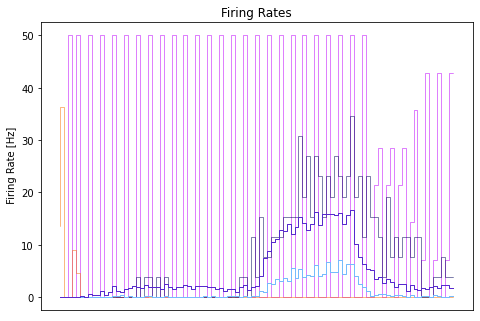

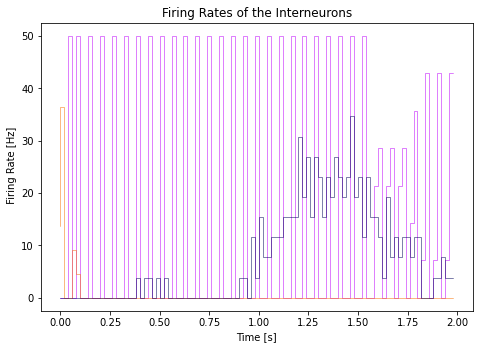

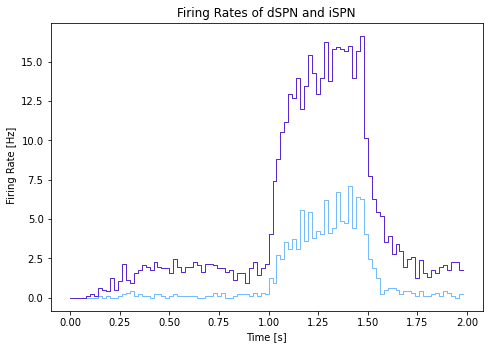

In [7]:
plotFR('net_1000')

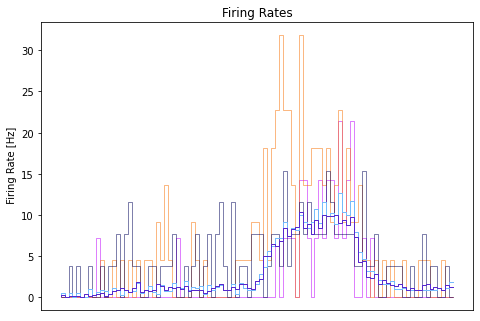

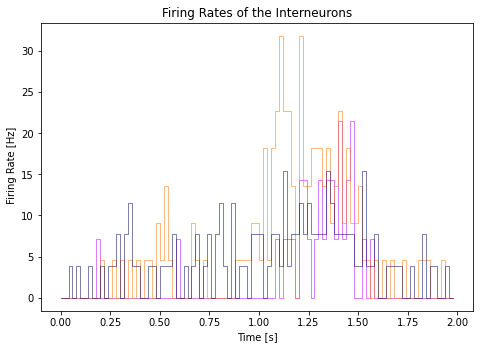

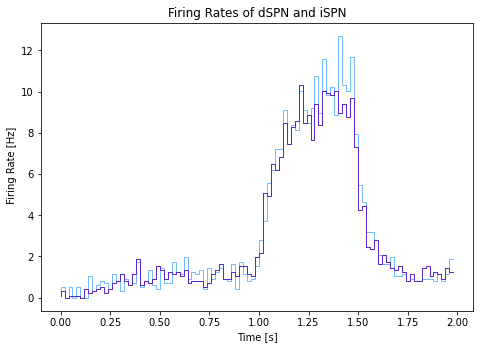

In [8]:
plotFR('net_1000_B')

## C) 10.000 Network

### C.1) Neuronal Distribution

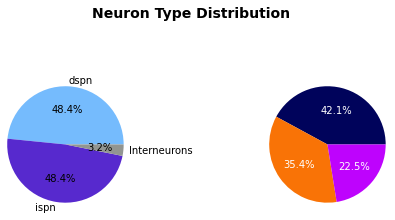

In [11]:
plotNeuronalDistribution('net_10000')

### C.2) Traces
we dont have the volt.txt file :(

### C.3) Raster Plot

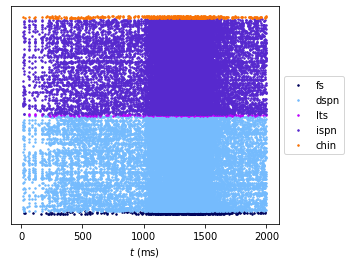

In [12]:
plotRaster('net_10000',10000)

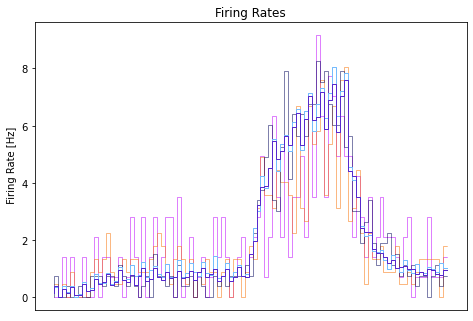

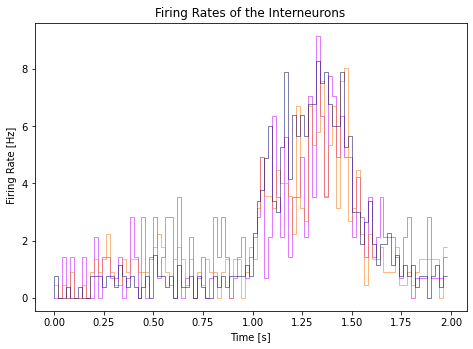

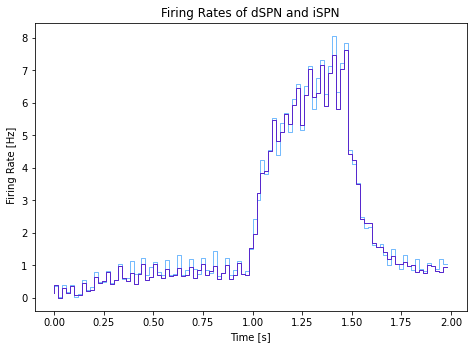

In [9]:
plotFR('net_10000')